<a href="https://colab.research.google.com/github/julietacepero/Proyecto_Final_DataScience/blob/main/ProyectoDS_ParteII_Cepero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este proyecto analizamos un dataset de ventas del año 2023 que incluye información de cuatro regiones (Norte, Sur, Este y Oeste) y de tres productos. El objetivo es entender cómo se comportan las ventas a lo largo del año y evaluar qué factores pueden influir en su rendimiento, como los costos operativos y la satisfacción del cliente. El dataset tiene datos mensuales completos, sin valores faltantes, y permite comparar regiones, productos y analizar la relación entre distintas variables comerciales. A partir de las visualizaciones y del análisis numérico buscamos identificar patrones, diferencias entre regiones y posibles relaciones entre ventas, costos y satisfacción del cliente.

**Objetivo del proyecto**:
Analizar el comportamiento de las ventas durante 2023 y evaluar cómo influyen la región, el producto, los costos operativos y la satisfacción del cliente.

**Hipótesis**:

Las regiones con mayores costos podrían tener también mayores ventas.

Una mayor satisfacción del cliente podría estar relacionada con un mejor rendimiento comercial.

¿Qué región tuvo el mejor nivel de ventas durante el año?

¿Existe relación entre la satisfacción del cliente y las ventas?

In [33]:
import pandas as pd

df = pd.read_csv("Ventas Dataset.csv")
df.head()


,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo
0,Norte,Producto_A,2023-01,4174,4.593086,1794
1,Norte,Producto_A,2023-02,2130,4.559382,2138
2,Norte,Producto_A,2023-03,3169,3.311989,830
3,Norte,Producto_A,2023-04,2482,4.732352,630
4,Norte,Producto_A,2023-05,2685,3.112823,2891


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                144 non-null    object 
 1   Producto              144 non-null    object 
 2   Mes                   144 non-null    object 
 3   Ventas                144 non-null    int64  
 4   Satisfaccion_Cliente  144 non-null    float64
 5   Costo_Operativo       144 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ KB


In [35]:
df.describe()


,Ventas,Satisfaccion_Cliente,Costo_Operativo
count,144.000000,144.000000,144.000000
mean,3144.236111,4.028516,1766.666667
std,1136.737000,0.562383,672.763843
min,1019.000000,3.013904,504.000000
25%,2148.750000,3.586549,1194.500000
50%,3164.500000,4.062289,1834.500000
75%,4126.500000,4.470005,2261.250000
max,4991.000000,4.995481,2933.000000


In [36]:
df["Mes"] = pd.to_datetime(df["Mes"], format="%Y-%m")
df.head()


,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo
0,Norte,Producto_A,2023-01-01,4174,4.593086,1794
1,Norte,Producto_A,2023-02-01,2130,4.559382,2138
2,Norte,Producto_A,2023-03-01,3169,3.311989,830
3,Norte,Producto_A,2023-04-01,2482,4.732352,630
4,Norte,Producto_A,2023-05-01,2685,3.112823,2891


In [37]:
df["Año"] = df["Mes"].dt.year
df["N_Mes"] = df["Mes"].dt.month

df.head()


,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo,Año,N_Mes
0,Norte,Producto_A,2023-01-01,4174,4.593086,1794,2023,1
1,Norte,Producto_A,2023-02-01,2130,4.559382,2138,2023,2
2,Norte,Producto_A,2023-03-01,3169,3.311989,830,2023,3
3,Norte,Producto_A,2023-04-01,2482,4.732352,630,2023,4
4,Norte,Producto_A,2023-05-01,2685,3.112823,2891,2023,5


In [38]:
print("Regiones:")
print(df["Region"].value_counts(), "\n")

print("Productos:")
print(df["Producto"].value_counts())


Regiones:
Region
Norte    36
Sur      36
Este     36
Oeste    36
Name: count, dtype: int64 

Productos:
Producto
Producto_A    48
Producto_B    48
Producto_C    48
Name: count, dtype: int64


In [39]:
df.isnull().sum()


,0
Region,0
Producto,0
Mes,0
Ventas,0
Satisfaccion_Cliente,0
Costo_Operativo,0
Año,0
N_Mes,0


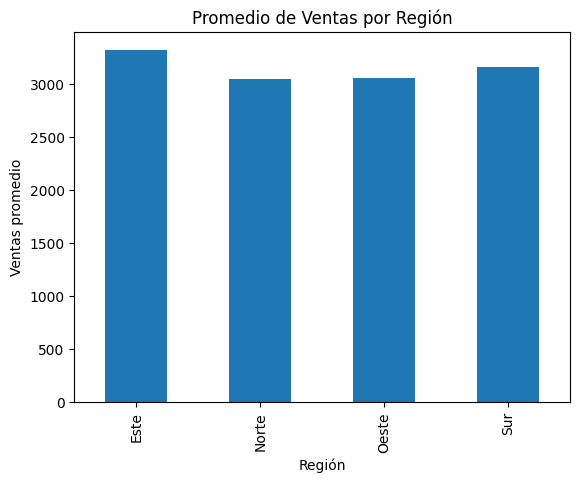

In [40]:
import matplotlib.pyplot as plt

df.groupby("Region")["Ventas"].mean().plot(kind="bar")

plt.title("Promedio de Ventas por Región")
plt.ylabel("Ventas promedio")
plt.xlabel("Región")
plt.show()


El gráfico muestra que todas las regiones tienen niveles de ventas similares, aunque la región Este es la que más vende en promedio.

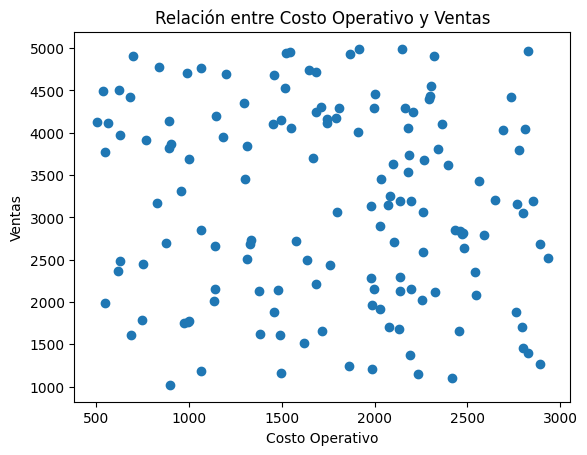

In [41]:
plt.scatter(df["Costo_Operativo"], df["Ventas"])

plt.title("Relación entre Costo Operativo y Ventas")
plt.xlabel("Costo Operativo")
plt.ylabel("Ventas")
plt.show()


En este gráfico no se observa una relación clara entre el costo operativo y las ventas. Hay puntos con costos altos y ventas bajas, y viceversa. Esto indica que gastar más no garantiza vender más.

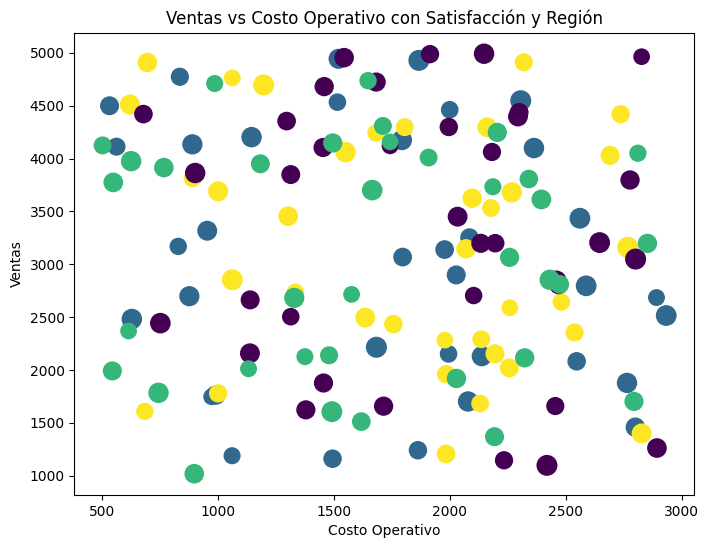

In [42]:
plt.figure(figsize=(8,6))

plt.scatter(
    df["Costo_Operativo"],
    df["Ventas"],
    s=df["Satisfaccion_Cliente"] * 40,  # tamaño proporcional
    c=df["Region"].astype("category").cat.codes,  # color por región
)

plt.title("Ventas vs Costo Operativo con Satisfacción y Región")
plt.xlabel("Costo Operativo")
plt.ylabel("Ventas")

plt.show()


Al combinar tres variables, se ve que la satisfacción y el costo tampoco explican directamente las ventas. Las regiones muestran comportamientos parecidos y no hay un patrón claro.

**Conclusión**: los gráficos permiten responder las preguntas planteadas: la región Este vende un poco más, pero ni los costos operativos ni la satisfacción del cliente parecen ser factores determinantes del nivel de ventas.

# Parte II – Feature Selection y Modelado Predictivo



En esta sección se complementa el análisis exploratorio realizado previamente mediante la aplicación de técnicas de reducción de dimensionalidad y un modelo de aprendizaje automático, con el objetivo de evaluar la capacidad predictiva de las variables disponibles sobre el nivel de ventas.



In [43]:
features = ["Costo_Operativo", "Satisfaccion_Cliente", "N_Mes"]
target = "Ventas"

X = df[features]
y = df[target]

X.head(), y.head()


(   Costo_Operativo  Satisfaccion_Cliente  N_Mes
 0             1794              4.593086      1
 1             2138              4.559382      2
 2              830              3.311989      3
 3              630              4.732352      4
 4             2891              3.112823      5,
 0    4174
 1    2130
 2    3169
 3    2482
 4    2685
 Name: Ventas, dtype: int64)

Se seleccionaron variables numéricas directamente relacionadas con el desempeño comercial y el comportamiento temporal de las ventas.
Estas variables permiten evaluar el impacto de los costos operativos, la satisfacción del cliente y la estacionalidad mensual sobre el nivel de ventas.


In [44]:
from sklearn.preprocessing import StandardScaler


In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [46]:
from sklearn.decomposition import PCA


In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("Varianza total explicada:")
print(pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente:
[0.38462169 0.32929774]
Varianza total explicada:
0.7139194364793802


Se aplicó el método PCA con el objetivo de reducir la dimensionalidad del conjunto de variables originales.
Los dos componentes principales obtenidos explican aproximadamente el 71% de la varianza total del dataset, lo que indica que la mayor parte de la información relevante se conserva al trabajar con un espacio de menor dimensión.
Esta reducción permite simplificar el modelo sin una pérdida significativa de información.



In [48]:
from sklearn.model_selection import train_test_split


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [50]:
from sklearn.linear_model import LinearRegression


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)


MSE: 1174703.080103202
MAE: 921.1849800572393
R2: 0.02218500185757022


Las métricas obtenidas indican que el modelo de regresión presenta una capacidad explicativa limitada.
El valor de R² cercano a cero sugiere que las variables seleccionadas, aun luego de aplicar reducción de dimensionalidad mediante PCA, no logran explicar de forma significativa la variabilidad observada en las ventas.

El error absoluto medio (MAE) muestra que, en promedio, las predicciones se desvían considerablemente del valor real, lo que refuerza la idea de que el modelo no es lo suficientemente preciso para fines predictivos en este contexto.


## Conclusiones Finales

En este proyecto se aplicaron técnicas de reducción de dimensionalidad y aprendizaje automático sobre un dataset de ventas correspondiente al año 2023. A partir del análisis exploratorio inicial y del posterior modelado predictivo, se observó que las variables disponibles (costos operativos, satisfacción del cliente y estacionalidad) no alcanzan para explicar de forma clara el comportamiento de las ventas.

La aplicación de PCA permitió reducir la cantidad de variables manteniendo una parte importante de la información original. Sin embargo, el modelo de regresión entrenado mostró una capacidad explicativa baja, lo cual se refleja en los valores obtenidos en las métricas de evaluación.

Estos resultados destacan la necesidad de incorporar más información para mejorar el desempeño del modelo, como datos sobre precios, promociones, canales de venta o características de los clientes.
